# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df = pd.read_csv('../data/checker_submits.csv')
df['timestamp']=pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df = df.drop('timestamp', axis=1)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [3]:
cols = ['uid', 'labname']
enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(df[cols])
enc_df = pd.DataFrame(enc_data, columns=enc.get_feature_names_out(cols))
df = df.drop(cols, axis=1)
df = pd.concat([df, enc_df], axis=1)
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
cols = ['numTrials', 'hour']
sc = StandardScaler()
df[cols] = sc.fit_transform(df[cols])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
accuracy_score(df['dayofweek'], [df['dayofweek'].mode()[0]] * len(df))

0.23487544483985764

In [6]:
df.to_csv('../data/dayofweek.csv', index=False)

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [7]:
model = LogisticRegression(random_state=21, fit_intercept=False)
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']
model.fit(X, y)
y_pred = model.predict(X)
accuracy_score(y, y_pred)

0.6405693950177936

In [8]:
coeffs = model.coef_ 
importance = np.sum(np.abs(coeffs), axis=0)

In [9]:
def plot_importance(importance, feature_names, top_n=10):
    indices = np.argsort(importance)[-top_n:]
    names = [feature_names[i] for i in indices]
    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), importance[indices], align='center')
    plt.yticks(range(top_n), names)
    plt.title("Top Feature Importances")
    plt.show()

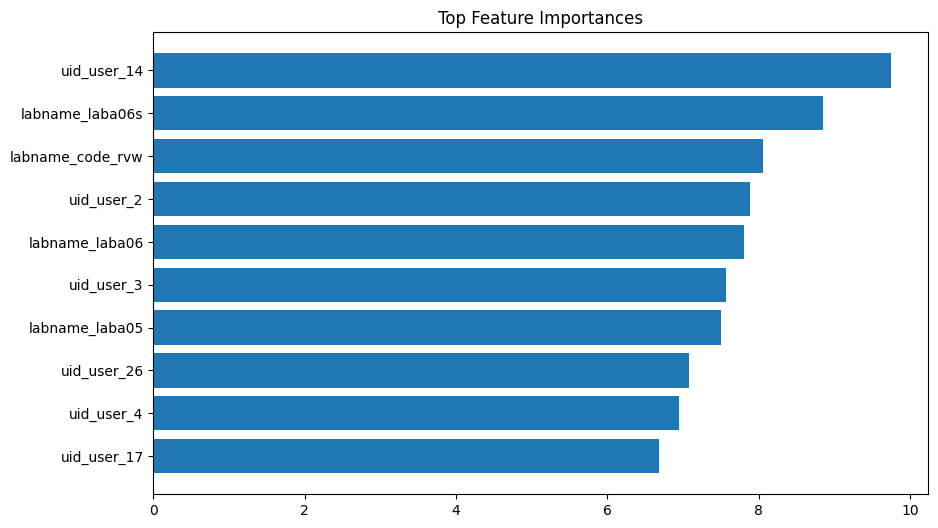

In [10]:
plot_importance(importance,X.columns, 10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [11]:
model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
model.fit(X, y)
y_pred = model.predict(X)
accuracy_score(y, y_pred)

0.6126927639383155

In [12]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracys = []
for kernel in kernels:
    mod = OneVsRestClassifier(
        SVC(kernel=kernel, probability=True, random_state=21)
    )
    mod.fit(X, y)
    acc = accuracy_score(y, model.predict(X))
    accuracys.append(acc)
print(accuracys)

[0.6126927639383155, 0.6126927639383155, 0.6126927639383155, 0.6126927639383155]


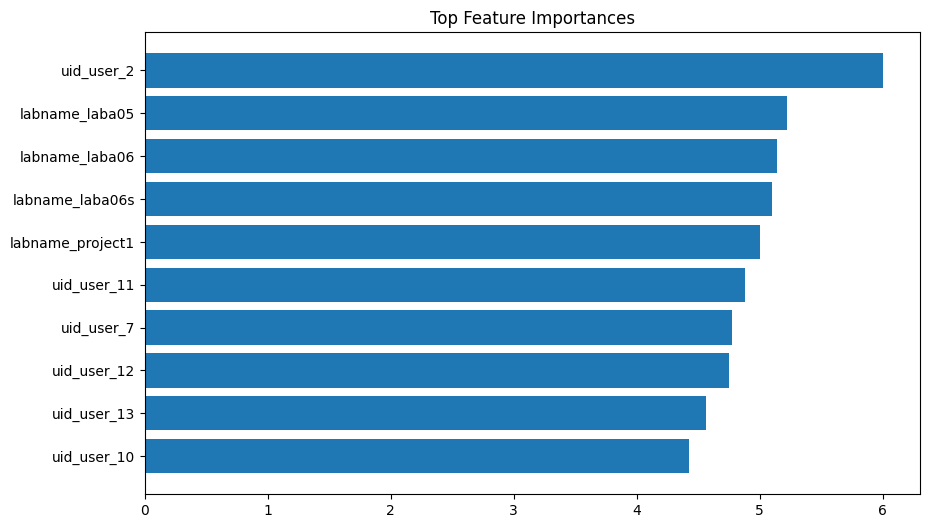

In [13]:
coeffs = np.array([estimator.coef_ for estimator in model.estimators_])
importance = np.sum(np.abs(np.vstack(coeffs)), axis=0)
plot_importance(importance, X.columns, 10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [14]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
model.fit(X, y)
y_pred = model.predict(X)
accuracy_score(y, y_pred)

0.5516014234875445

In [15]:
max_depths = range(1, 11)
accuracys = []
for depth in max_depths:
    mod = DecisionTreeClassifier(max_depth=depth, random_state=21)
    mod.fit(X, y)
    acc = accuracy_score(y, model.predict(X))
    accuracys.append(acc)
print(accuracys)

[0.5516014234875445, 0.5516014234875445, 0.5516014234875445, 0.5516014234875445, 0.5516014234875445, 0.5516014234875445, 0.5516014234875445, 0.5516014234875445, 0.5516014234875445, 0.5516014234875445]


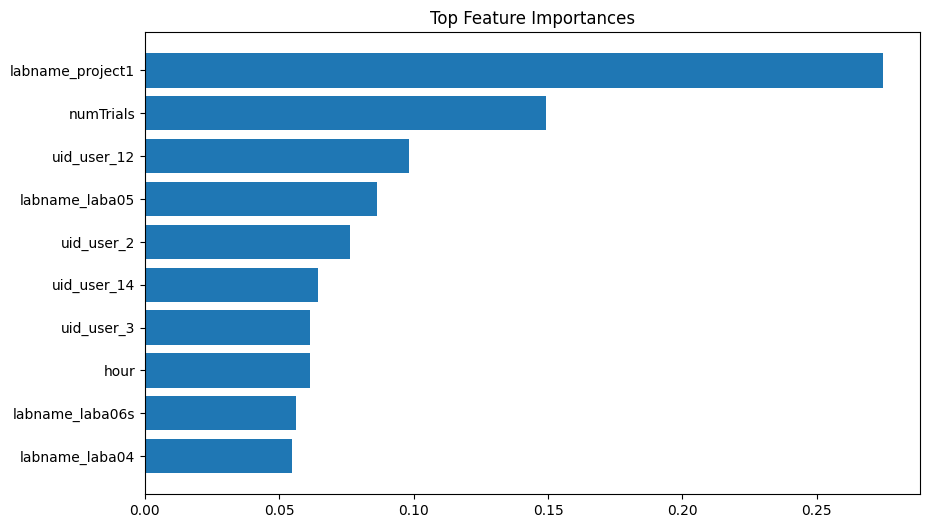

In [16]:
plot_importance(model.feature_importances_, X.columns, 10)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [17]:
model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
model.fit(X, y)
model.score(X, y)

1.0

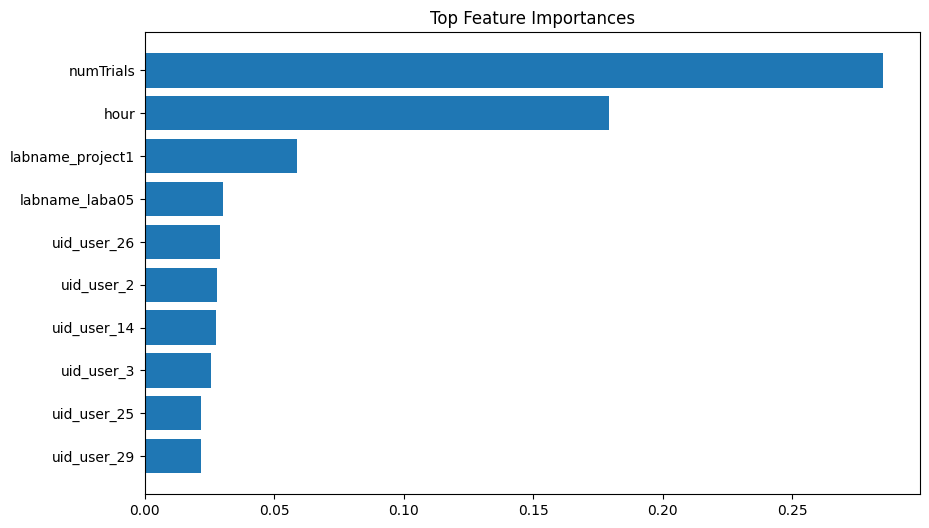

In [18]:
plot_importance(model.feature_importances_, X.columns, top_n=10)

In [19]:
n_estimators = [25, 50, 75, 100]
max_depths = [5, 15, 25, 35]
for depth in max_depths:
    for n in n_estimators:
        mod = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=21)
        mod.fit(X, y)
        acc = mod.score(X, y)
        print(f"max_depth={depth}, n_estimators={n}: Accuracy={acc}")

max_depth=5, n_estimators=25: Accuracy=0.5960854092526691
max_depth=5, n_estimators=50: Accuracy=0.5848161328588375
max_depth=5, n_estimators=75: Accuracy=0.5771055753262159
max_depth=5, n_estimators=100: Accuracy=0.5794780545670225
max_depth=15, n_estimators=25: Accuracy=0.9679715302491103
max_depth=15, n_estimators=50: Accuracy=0.9786476868327402
max_depth=15, n_estimators=75: Accuracy=0.9792408066429419
max_depth=15, n_estimators=100: Accuracy=0.9780545670225386
max_depth=25, n_estimators=25: Accuracy=0.9994068801897983
max_depth=25, n_estimators=50: Accuracy=1.0
max_depth=25, n_estimators=75: Accuracy=0.9994068801897983
max_depth=25, n_estimators=100: Accuracy=1.0
max_depth=35, n_estimators=25: Accuracy=1.0
max_depth=35, n_estimators=50: Accuracy=1.0
max_depth=35, n_estimators=75: Accuracy=1.0
max_depth=35, n_estimators=100: Accuracy=1.0
